In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sklearn
import librosa
from IPython.display import Audio
import os
import soundfile as sf


import tensorflow as tf
import cv2
import audio

C:\Conda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Conda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Conda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Для Colab
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"

# import sys

# sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/Neural Networks')

# import audio

## Небольшое введение в обработку звука

Звук - вибрации которые опрделяют колебания молекул воздуха, которые в основном создают чередования давления воздуха и это высокое давление чередуется с низким давлением и вызывает волну.

- 1 kHz - 1000 импульсов в секунду

- Период(T) - даёт нам представление о том когда у нас есть тоже самое что и начало у волны (от пика до пика)

- Частота(freq) - обратная функция для периода  =   1 / период. Чем ниже период, тем выше частота

- Амплитуда(A) - расстояние от нулевой точки до пика

$$y(t) = A*sin(2\pi * freq*T + shift)$$

Частота и высота звука связаны друг с другом. Более высокие частоты воспринимаются как более высокая высота.

Большие Амплитуды воспринимаются громче

Так выглядит спектрограмма для мужчин и женчин. Женщины имеют более высокую частоту, так как они имеют более высокий голос
![male-female spectrum](https://www.researchgate.net/profile/Andre-Coy/publication/235008394/figure/fig1/AS:669403469316097@1536609632056/A-comparison-of-auditory-spectrograms-of-a-male-utterance-top-a-female-utterance.png)

где 
* x - время 
* y - частота
* значения пикселей - амплитуда

In [3]:
# Укажем пути к папкам с песнями
path_like = 'Like\\wav'
path_dlike = "Doesn't like\\wav"
path_for_test = 'Test'

# Google Colab
# path_like = '/content/gdrive/MyDrive/Colab Notebooks/Neural Networks/Like/wav'
# path_dlike = "/content/gdrive/MyDrive/Colab Notebooks/Neural Networks/Doesn't like/wav"

# Импортируем модуль
like_or_not = audio.Like_or_not(path_like,            # Путь к песням которые вам нравятся
                                path_dlike,           # Путь к песням которые не нравятся
                                start=10,             # С какой секунды будут начинаться песни
                                duration=120,          # Длительность песни в секундах
                                sample_rate=22050,    # Частота дискретизации (сколько измерений делаем в секунду)
                                figsize=(18, 10),     # Размер картинки при сохранении изображений спектрограмм
                               )                      
# Если вы используете среду разработки, то я рекомедую оставить значение по умолчанию

# Для начала сверим версии библиотек
like_or_not.show_libraries_version()

Your pandas version is 1.3.5, needed: 1.2.0 and more
Your numpy version is 1.21.5, needed: 1.21.0 and more
Your sklearn version is 1.0.2, needed: 1.0.2 and more
Your tqdm version is 4.62.3, needed: 4.62.0 and more
Your librosa version is 0.8.1, needed: 0.9.0 and more
Your Open-CV version is 4.5.1, needed: 4.5.0 and more
Your TensorFlow version is 2.7.0, needed: 2.6.0 and more


In [4]:
# Посмотрим на наши данные
data = like_or_not.get_name_song()
# Общее количество трэков
print(len(like_or_not))  

data.head(3)

69


,song_name,path,target
0,Вот и всё,Doesn't like\wav\Вот и всё.wav,0
1,Luxe Agoris & Third Vibes - Floating (Feat. Je...,Like\wav\Luxe Agoris & Third Vibes - Floating ...,1
2,Sistek - Stranded (feat. Alexanderson),Like\wav\Sistek - Stranded (feat. Alexanderson...,1


In [5]:
print(like_or_not)

Использовать файлы в формате 'wav'. Если вы уверены, что у вас все трэки имеют одинаковую частоту дискретизации (sample_rate), то тогда лучше использовать библиотеку SoundFile. Эта библиотека гараздо быстрее загружает песни. В методе load_songs она уже есть, необходимо только поменять либросу на sf 


Можно в этом убедиться

In [8]:
%%time
# Загрузим треки для примера через librosa
librosa_audio_1, sr = librosa.load(os.path.join(path_like, 'Compoforest (Black Light Smoke Remix).wav'), sr=48000)
librosa_audio_1.shape, sr

CPU times: user 410 ms, sys: 114 ms, total: 524 ms
Wall time: 1.48 s


In [9]:
%%time
# Теперь через sf
sf_audio, sf_sr = sf.read(file=os.path.join(path_like, 'Compoforest (Black Light Smoke Remix).wav'))
sf_audio.shape, sf_sr

CPU times: user 43.4 ms, sys: 102 ms, total: 146 ms
Wall time: 200 ms


In [10]:
%%time
# Другую песню
librosa_audio_2, sr = librosa.load(os.path.join(path_like, 'Boy Harsher - R.O.V. (New Beat Edit).wav'), sr=48000)
librosa_audio_2.shape, sr

CPU times: user 476 ms, sys: 78.1 ms, total: 554 ms
Wall time: 3.32 s


In [11]:
%%time
sf_audio, sf_sr = sf.read(file=os.path.join(path_like, 'Boy Harsher - R.O.V. (New Beat Edit).wav'))
sf_audio.shape

CPU times: user 49.8 ms, sys: 102 ms, total: 151 ms
Wall time: 220 ms


Как видно Sound File работает в 2-3 раза быстрее. На выходе у sf_audio массив получается 2D. Это очень легко исправить

In [12]:
# Посмотрим на длинну треков
print(librosa_audio_1.shape[0] / sr / 60)                  # ==> 5:57
print((sf_audio.sum(axis=1)/2).shape[0] / sf_sr / 60)      # ==> 6.21

5.944954166666666
6.348335763888889


In [13]:
# Можно прослушать их
# display(Audio(data=librosa_audio_1, rate=sr))
# display(Audio(data=librosa_audio_2, rate=sf_sr))

## Получение признаков для бинарной классификации

In [14]:
# Получение признаков
X, y = like_or_not.get_X_y()
display(X.head(3))
display(y.head(3))

 ----- Load audio ----- 


100%|██████████| 69/69 [07:01<00:00,  6.10s/it]


 ----- Calculate features ----- 


100%|██████████| 69/69 [01:47<00:00,  1.56s/it]


,song_name,path,duration,crossings_zero,rmse,chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
0,Ahmet Kilic - We Still Alive (DJ Tarkan Remix),/content/gdrive/MyDrive/Colab Notebooks/Neural...,120.0,1325.858333,0.289359,0.462306,1778.972268,2094.352711,3845.703829,0.060089,-100.484024,115.293045,-0.799172,27.626587,18.746754,19.520409,0.285952,9.245353,9.634509,6.367954,-5.640825,6.415653,-0.493189,4.687083,1.600223,2.073700,-5.739932,-1.841009,-6.943012,-0.804603
1,Xassa BODIEV Грехи,/content/gdrive/MyDrive/Colab Notebooks/Neural...,120.0,1892.725000,0.276268,0.381156,2337.870552,2593.329667,5146.227215,0.085780,-42.300762,94.664810,3.544536,12.365139,10.290798,4.686241,-4.043229,3.939229,-5.741296,0.809968,-6.666368,-1.099304,-2.139824,-1.120730,-2.278375,0.046858,-8.682303,-1.905961,-1.435657,-2.433598
2,Ben Phipps - I Don't Think So,/content/gdrive/MyDrive/Colab Notebooks/Neural...,120.0,1564.950000,0.207988,0.341391,2072.166276,2514.546684,4713.452748,0.070927,-156.606934,95.871323,30.946682,18.373091,7.762008,3.927600,6.495737,-11.662167,-2.530481,-1.227089,-10.890208,-4.683125,-13.671255,-0.813516,-6.584228,0.805436,-1.868564,0.208544,-3.095558,2.811414


0    1
1    0
2    1
Name: target, dtype: object

In [15]:
from sklearn.preprocessing import StandardScaler

# Отмасштабируем наши данные
scaler = StandardScaler()

X = scaler.fit_transform(X.drop(["song_name","path"],axis=1).values)
X.shape, y.shape

((69, 28), (69,))

In [16]:
# Сделаем кросс-валидацию и посчитаем точность
cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
model = sklearn.linear_model.LogisticRegression(class_weight='balanced')

cv_score = sklearn.model_selection.cross_val_score(model, X, y, cv=cv)
cv_score.mean()

0.6076923076923076

In [17]:
del X, y

Результат не очень, но его можно улучшить подобрав наилучшую модель и параметры для неё. Плюс в выборке всего 69 трэков

## Попробуем улучшить результат с помощью нейронных сетей

В обработке сигналов семплинг — это преобразование непрерывного сигнала в серию дискретных значений. Частота дискретизации — это количество семплов за определенный фиксированный промежуток времени. Высокая частота дискретизации приводит к меньшей потере информации, но к большим вычислительным затратам.

1. Свёрточная 2D нейросеть
2. Свёрточная 1D нейросеть
3. Рекурентная сеть

#### Спектральные (частотные) признаки получаются путем преобразования временного сигнала в частотную область с помощью преобразования Фурье

При выборе типа спектра нет точного алгоритма когда какой применять, но можно предположить следующее:
- 'stft' - Short Time Fourier Transform. Оконное преобразование Фурье. 

- 'cqt' - Constant Q-Transform - Преобразование с постоянным Q увеличивает размер окна для низких частот и уменьшая размер окна для высоких частот. Другими словами, преобразование Constant Q даст лучшие результаты в области низких частот и логарифмического отображения частоты, но его крайне сложно заставить работать в реальном времени, и оно имеет немного меньшую детализацию в области верхних частот.

- 'mfcc' - Кепстральные коэффициенты Mel частоты (MFCC) сигнала представляют собой небольшой набор признаков (обычно около 10–20), которые кратко описывают общую форму огибающей спектра. Он моделирует характеристики человеческого голоса.

__Частоты цветности__


Характеристики Chroma - интересное и мощное представление для музыкального аудио, в котором весь спектр проецируется на 12 элементов разрешения, представляющих 12 различных полутонов (или цветность) музыкальной октавы.

Признак или вектор цветности обычно представлен вектором признаков из 12 элементов, в котором указано количество энергии каждого высотного класса {C, C#, D, D#, E, …, B} в сигнале. Используется для описания меры сходства между музыкальными произведениями.

- 'chroma_stft'
- 'chroma_cqt'

(1025, 33441) (1025, 35710)


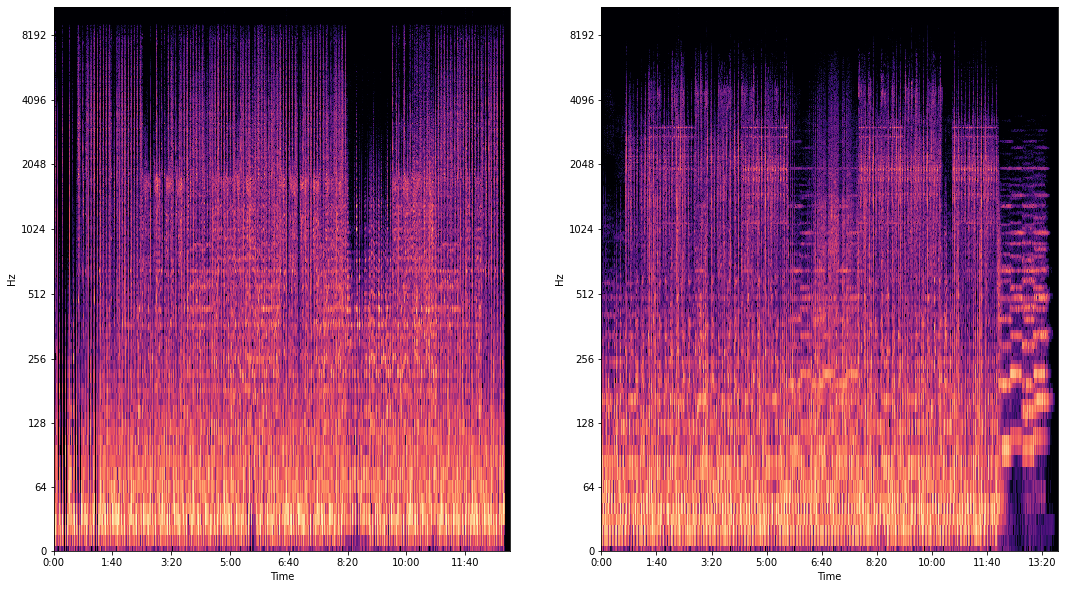

In [18]:
# Расчёт
D_1 = librosa.stft(librosa_audio_1)
D_2 = librosa.stft(librosa_audio_2)
# 
log_spectrogram_1 = librosa.power_to_db(D_1**2, ref=np.max)
log_spectrogram_2 = librosa.power_to_db(D_2**2, ref=np.max)

print(D_1.shape, D_2.shape)

fig, axes = plt.subplots(nrows=1, ncols=2)

librosa.display.specshow(log_spectrogram_1, x_axis='time', y_axis='log', ax=axes[0])
librosa.display.specshow(log_spectrogram_2, x_axis='time', y_axis='log', ax=axes[1]);

(84, 33441) (84, 35710)


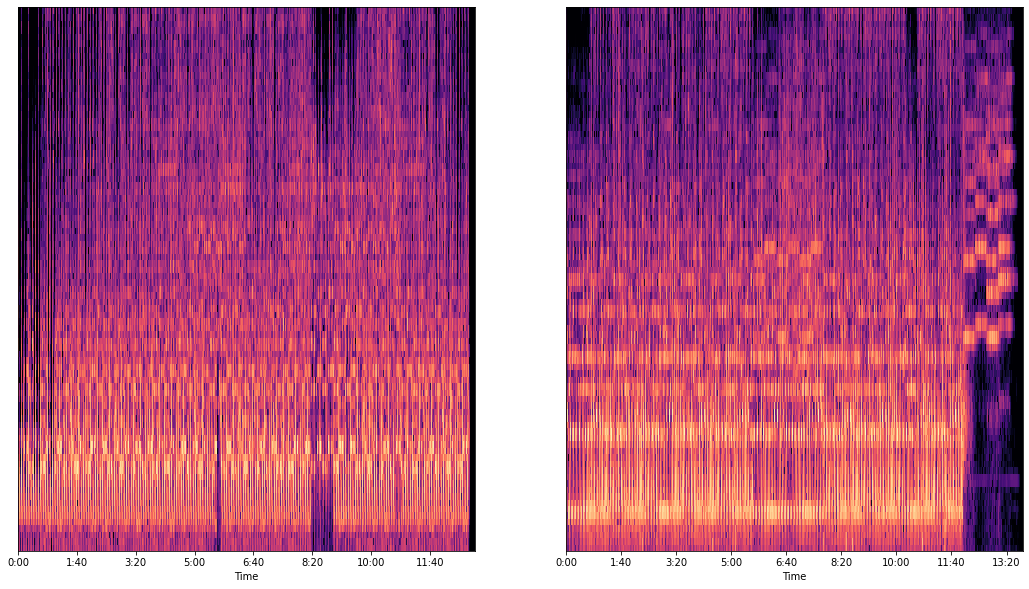

In [19]:
# Constant Q-Transform CQT
CQT_1 = librosa.cqt(librosa_audio_1, sr)
CQT_2 = librosa.cqt(librosa_audio_2, sr)

log_spec_cqt_1 = librosa.power_to_db(np.abs(CQT_1**2), ref=np.max)
log_spec_cqt_2 = librosa.power_to_db(np.abs(CQT_2**2), ref=np.max)

print(CQT_1.shape, CQT_2.shape)

fig, axes = plt.subplots(nrows=1, ncols=2)

librosa.display.specshow(log_spec_cqt_1, x_axis='time', ax=axes[0])
librosa.display.specshow(log_spec_cqt_2, x_axis='time', ax=axes[1]);

(20, 33441) (20, 35710)


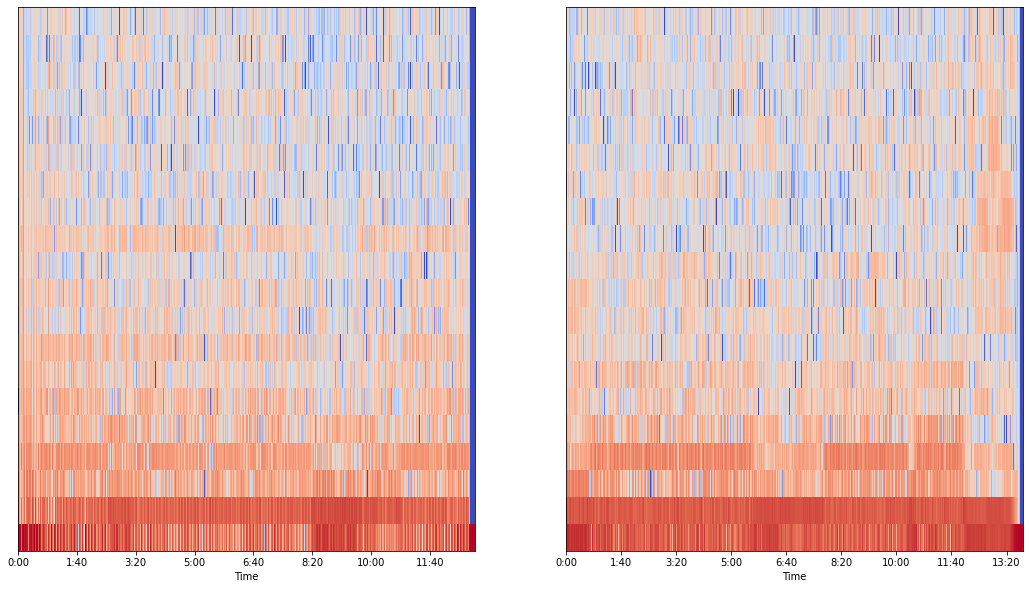

In [20]:
MFCC_1 = librosa.feature.mfcc(y=librosa_audio_1, sr=sr)
MFCC_2 = librosa.feature.mfcc(y=librosa_audio_2, sr=sr) 

log_spec_mfcc_1 = librosa.power_to_db(np.abs(MFCC_1**2))
log_spec_mfcc_2 = librosa.power_to_db(np.abs(MFCC_2**2))

print(MFCC_1.shape, MFCC_2.shape)

fig, axes = plt.subplots(nrows=1, ncols=2)

librosa.display.specshow(log_spec_mfcc_1, x_axis='time', ax=axes[0])
librosa.display.specshow(log_spec_mfcc_2, x_axis='time', ax=axes[1]);

(12, 8361)


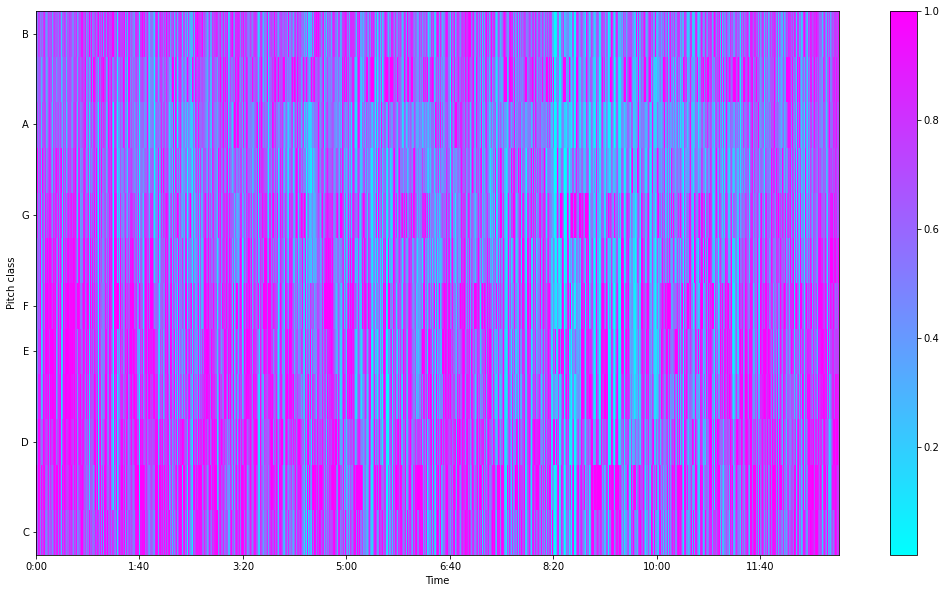

In [21]:
hop_length = 2048
chromagram = librosa.feature.chroma_stft(librosa_audio_1, sr=sr, hop_length=hop_length)

print(chromagram.shape)

librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='cool');
plt.colorbar();

(12, 33441) (12, 35710)


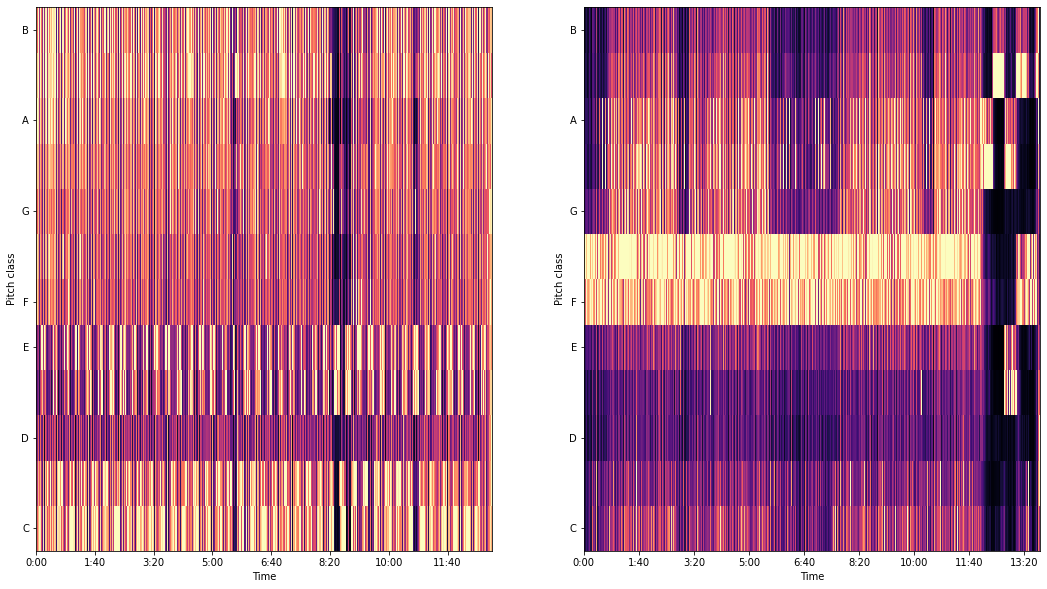

In [22]:
# CQT
c_cqt_1 = librosa.feature.chroma_cqt(librosa_audio_1, sr=sr)
c_cqt_2 = librosa.feature.chroma_cqt(librosa_audio_2, sr=sr)

print(c_cqt_1.shape, c_cqt_2.shape)

fig, axes = plt.subplots(nrows=1, ncols=2)

librosa.display.specshow(c_cqt_1, x_axis='time', y_axis='chroma', ax=axes[0])
librosa.display.specshow(c_cqt_2, x_axis='time', y_axis='chroma', ax=axes[1]);

 ----- Saving pictures ----- 


100%|██████████| 69/69 [02:30<00:00,  2.18s/it]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1964, 1045, 20)    4020      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 980, 521, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 971, 512, 50)      100050    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 484, 252, 50)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 480, 243, 70)      175070    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 119, 120, 70)     0

100%|██████████| 69/69 [00:02<00:00, 23.63it/s]


Epoch 1/50
46/46 [==============================] - ETA: 0s - loss: 1.0293 - accuracy: 0.6087
Epoch 1: val_loss improved from inf to 0.68959, saving model to saved_model/models.hdf5
46/46 [==============================] - 50s 767ms/step - loss: 1.0293 - accuracy: 0.6087 - val_loss: 0.6896 - val_accuracy: 0.6522 - lr: 3.0000e-04
Epoch 2/50
46/46 [==============================] - ETA: 0s - loss: 1.7890 - accuracy: 0.5870
Epoch 2: val_loss did not improve from 0.68959
46/46 [==============================] - 33s 719ms/step - loss: 1.7890 - accuracy: 0.5870 - val_loss: 0.6936 - val_accuracy: 0.3478 - lr: 3.0000e-04
Epoch 3/50
46/46 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.6522
Epoch 3: val_loss improved from 0.68959 to 0.68592, saving model to saved_model/models.hdf5
46/46 [==============================] - 35s 755ms/step - loss: 0.6894 - accuracy: 0.6522 - val_loss: 0.6859 - val_accuracy: 0.6522 - lr: 3.0000e-04
Epoch 4/50
46/46 [==========================

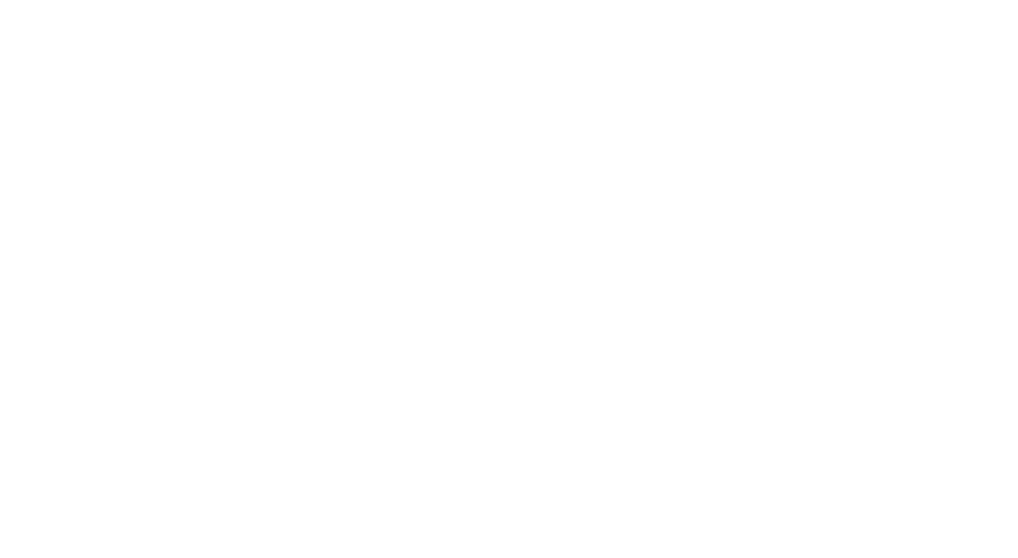

In [23]:
# Инициализация и Обучение NN
# Сохраним изображения спектрограм для сети
like_or_not.save_img(spec='chroma_cqt')

# Инициализируем сеть
model = like_or_not.spec_Conv2D(learning_rate=0.0003)
model.fit(epochs=50,         # Количество 'проходов'
          batch_size=1,      # Размер батча (подвыборки)
          n_splits=3,        # Количество разбиений на кросс-валидации
          device='/gpu:0',   # Какое устройство используем (по умолчанию '/cpu:0')
          patience=5,        # Через сколько эпох уменьшится скорость обучения, если ошибка на валидации не улучшилась
          verbose=True,      # Выводить ли информацию об обучении
         )
# Получим прогноз
pred = model.predict(path_for_test)

Результат получился не очень, потому что у меня мало данных. Попробуем LSTM свёрточную сеть

 ----- Saving pictures ----- 


100%|██████████| 69/69 [00:40<00:00,  1.68it/s]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1973, 200)         170400    
                                                                 
 lstm_1 (LSTM)               (None, 1973, 100)         120400    
                                                                 
 dropout_1 (Dropout)         (None, 1973, 100)         0         
                                                                 
 time_distributed (TimeDistr  (None, 1973, 1024)       103424    
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1973, 256)        262400    
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1973, 32)        

100%|██████████| 69/69 [00:02<00:00, 25.70it/s]

Epoch 1/50


46/46 [==============================] - ETA: 0s - loss: 0.7956 - accuracy: 0.6304
Epoch 1: val_loss improved from inf to 0.67714, saving model to saved_model/models.hdf5
46/46 [==============================] - 31s 569ms/step - loss: 0.7956 - accuracy: 0.6304 - val_loss: 0.6771 - val_accuracy: 0.6522 - lr: 5.0000e-04
Epoch 2/50
46/46 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.6522
Epoch 2: val_loss improved from 0.67714 to 0.66441, saving model to saved_model/models.hdf5
46/46 [==============================] - 25s 545ms/step - loss: 0.6808 - accuracy: 0.6522 - val_loss: 0.6644 - val_accuracy: 0.6522 - lr: 5.0000e-04
Epoch 3/50
46/46 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.6522
Epoch 3: val_loss did not improve from 0.66441
46/46 [==============================] - 25s 543ms/step - loss: 0.6490 - accuracy: 0.6522 - val_loss: 0.6719 - val_accuracy: 0.6522 - lr: 5.0000e-04
Epoch 4/50
46/46 [==============================] - ETA

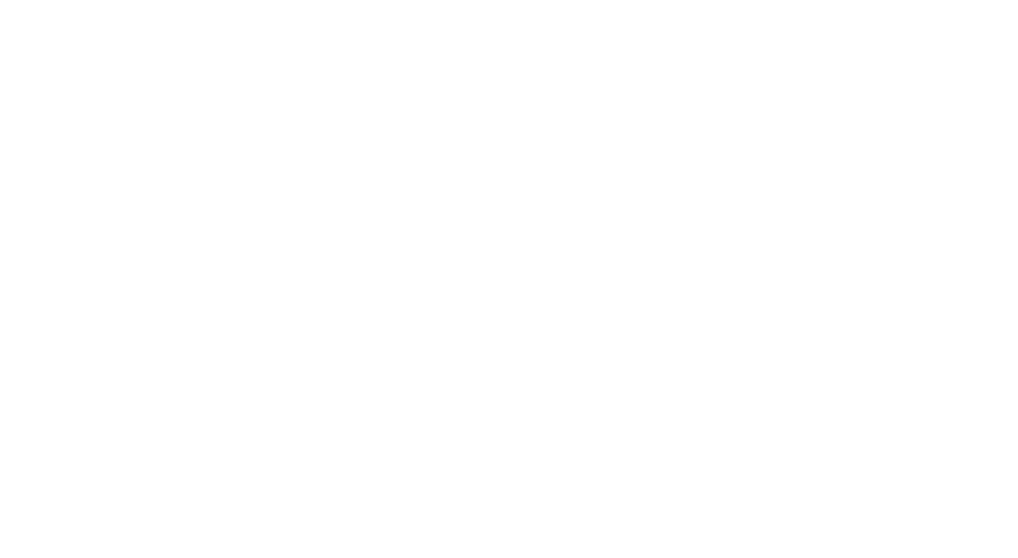

In [24]:
# Сохраним изображения спектрограм для сети, на этот раз возьмём cqt
like_or_not.save_img(spec='chroma_stft')

# Инициализируем сеть
model = like_or_not.spec_LSTM(learning_rate=0.0005)
model.fit(epochs=50,         # Количество 'проходов'
          batch_size=1,      # Размер батча (подвыборки)
          n_splits=3,        # Количество разбиений на кросс-валидации
          device='/gpu:0',   # Какое устройство используем (по умолчанию '/cpu:0')
          patience=5,        # Через сколько эпох уменьшится скорость обучения, если ошибка на валидации не улучшилась
          verbose=True,      # Выводить ли информацию об обучении
         )
# Получим прогноз
pred = model.predict(path_for_test)

Попробуем 1D свёрточную сеть

In [25]:
# Инициализируем сеть
model = like_or_not.spec_Conv1D(learning_rate=0.0005)
model.fit(epochs=60,         # Количество 'проходов'
          batch_size=1,      # Размер батча (подвыборки)
          n_splits=8,        # Количество разбиений на кросс-валидации
          device='/gpu:0',   # Какое устройство используем (по умолчанию '/cpu:0')
          patience=5,        # Через сколько эпох уменьшится скорость обучения, если ошибка на валидации не улучшилась
          verbose=True,      # Выводить ли информацию об обучении
         )
# Получим прогноз
pred = model.predict(path_for_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2638509, 10)       610       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 879500, 10)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 879500, 10)        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 879500, 20)        6020      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 293167, 20)       0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 293167, 20)       

Если у вас уже есть готовые изображения спектрограмм, то их можно загрузить в метод spec_Conv2D или spec_LSTM

In [6]:
# Инициализируем модель с входом для ваших изображений спектрограмм
model = like_or_not.spec_Conv2D(learning_rate=0.001, path_with_imgs='Spec_pictures_chroma_cqt')
# Укажите ваши цели
like_or_not.target = data.target.astype('int8')

model.fit(epochs=20,         
          batch_size=1,      
          n_splits=3,       
          device='/cpu:0',
         )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1978, 1053, 20)    4020      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 987, 525, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 978, 516, 50)      100050    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 487, 254, 50)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 483, 245, 70)      175070    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 120, 121, 70)     0

100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [00:01<00:00, 55.93it/s]


Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 4.6355 - accuracy: 0.6304
Epoch 00001: val_loss improved from inf to 0.64962, saving model to saved_model\models.hdf5
46/46 [==============================] - 256s 6s/step - loss: 4.6355 - accuracy: 0.6304 - val_loss: 0.6496 - val_accuracy: 0.6522 - lr: 0.0010
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 0.6578 - accuracy: 0.6522
Epoch 00002: val_loss improved from 0.64962 to 0.64824, saving model to saved_model\models.hdf5
46/46 [==============================] - 253s 6s/step - loss: 0.6578 - accuracy: 0.6522 - val_loss: 0.6482 - val_accuracy: 0.6522 - lr: 0.0010
Epoch 3/20
10/46 [=====>........................] - ETA: 3:02 - loss: 0.7586 - accuracy: 0.4000

KeyboardInterrupt: 

Если у вас уже есть обученная модель, то её можно загрузить в метод предикт

 ----- Load test audio ----- 


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:27<00:00,  3.03s/it]


,Name,Predict
0,Boy Harsher - R.O.V. (New Beat Edit).wav,1.0
1,Denzel Curry Walkin Official Music Video.wav,1.0
2,Fleurs Du Mal Fragrance Remix.wav,1.0
3,Hot Since 82 Make Up.wav,1.0
4,HVZVRD ADDICTED.wav,1.0
5,Lunar Lost (Black Light Smoke Remix).wav,1.0
6,Russian Village Boys Mr Polska MOLOTOV.wav,1.0
7,Trippie Redd Pour a 4 Up.wav,1.0
8,Xassa BODIEV Грехи.wav,1.0


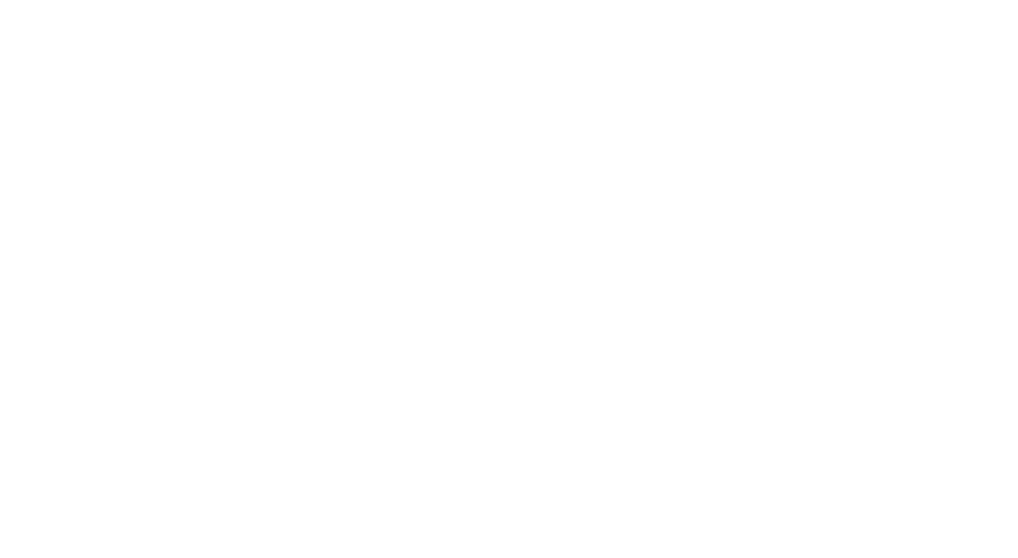

In [7]:
# Для начала укажем необходимые атрибуты
like_or_not._spectrum = 'chroma_cqt'
like_or_not._model_name = 'Conv2D'
# Загрузим обученную модель для предсказания
pred = like_or_not.predict(test_path=path_for_test, saved_model='saved_model/models.hdf5')
pred